# Previsão de preço de carro


### Declaração do problema
A empresa automobilística chinesa Geely Auto aspira entrar no mercado dos EUA estabelecendo sua unidade de fabricação lá e produzindo carros localmente para competir com seus colegas americanos e europeus.

Eles contrataram uma empresa de consultoria automobilística para entender os fatores dos quais depende o preço dos carros. Especificamente, eles querem entender os fatores que afetam os preços dos carros no mercado americano, pois podem ser muito diferentes do mercado chinês. A empresa quer saber:

     - Quais variáveis são significativas na previsão do preço de um carro
     - Quão bem essas variáveis descrevem o preço de um carro

Com base em várias pesquisas de mercado, a consultoria reuniu um grande conjunto de dados de diferentes tipos de carros em todo o mercado americano.

### Objetivo de Negócios

Você é obrigado a modelar o preço dos carros com as variáveis independentes disponíveis. Ele será usado pela administração para entender exatamente como os preços variam com as variáveis independentes. Eles podem manipular o design dos carros, a estratégia de negócios etc. para atender a determinados níveis de preços. Além disso, o modelo será uma boa maneira de a administração entender a dinâmica de preços de um novo mercado

In [93]:
import warnings
warnings.filterwarnings('ignore')

#Importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

seed_number = 123

### Etapa 1: Lendo e entendendo os dados

Vamos começar com os seguintes passos:

1. Importando dados usando a biblioteca pandas
2. Entendendo a estrutura dos dados

In [94]:
main_dir = ''
from google.colab import drive
drive.mount('/content/drive')
main_dir = '/content/drive/MyDrive/Cursos/Machine Learning - NCA/pratica/regressao_linear/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
cars = pd.read_csv(f'{main_dir}input/CarPrice_Assignment.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [96]:
cars.set_index('car_ID', inplace=True)
cars.shape

(205, 25)

In [97]:
print(cars.describe().shape)
cars.describe()

(8, 15)


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [98]:
num_vars = cars.describe().columns.to_list()
# ou
num_vars = cars.select_dtypes(exclude=['object']).columns.tolist()

print(f'#{len(num_vars)}: {num_vars}')

#15: ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [99]:
print(cars.describe(include=['O']).shape)
cars.describe(include=['O'])

(4, 10)


,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [100]:
cat_vars = cars.select_dtypes(include=['object']).columns.tolist()

print(f'#{len(cat_vars)}: {cat_vars}', )

#10: ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


### Etapa 2: Limpeza e preparação de dados

In [101]:
#Dividindo o nome da empresa da coluna CarName
CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])
cars.insert(3,"CompanyName",CompanyName)
cars.drop(['CarName'],axis=1,inplace=True)
cars.head()

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [102]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

##### Corrigindo valores inválidos
- Parece haver algum

    - `maxda` = `mazda`
    - `Nissan` = `nissan`
    - `porsche` = `porcshce`
    - `toyota` = `toyouta`
    - `vokswagen` = `volkswagen` =  `vw`

In [103]:
cars.CompanyName = cars.CompanyName.str.lower()

def replace_name(a,b):
    cars.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [104]:
# Checando dados nulos
cars.isnull().sum()

symboling           0
fueltype            0
CompanyName         0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### Etapa 3: Visualizando os dados

#### Etapa 3.1: Visualizando Dados Categóricos

<Figure size 1872x432 with 0 Axes>

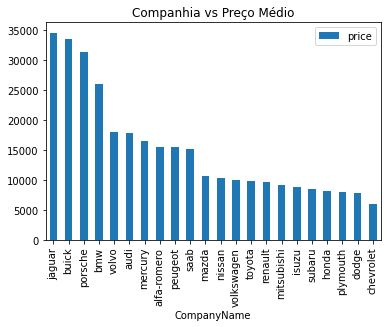

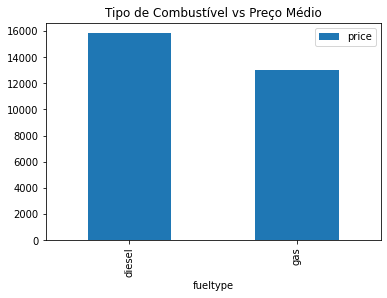

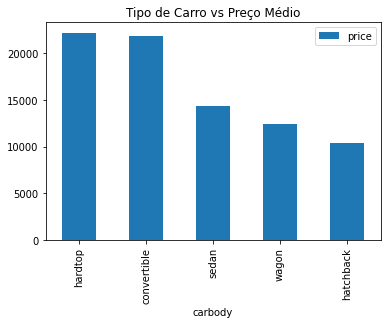

In [105]:
plt.figure(figsize=(26, 6))

df = pd.DataFrame(cars.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Companhia vs Preço Médio')
plt.show()

df = pd.DataFrame(cars.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Tipo de Combustível vs Preço Médio')
plt.show()

df = pd.DataFrame(cars.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Tipo de Carro vs Preço Médio')
plt.show();

#### Inferência:

1. `Jaguar` e `Buick` parecem ter o preço médio mais alto.
2. `diesel` tem preço médio superior ao do gás.
3. `hardtop` e `convertible` têm preço médio mais alto.

#### Etapa 3.2: Visualizando dados numéricos

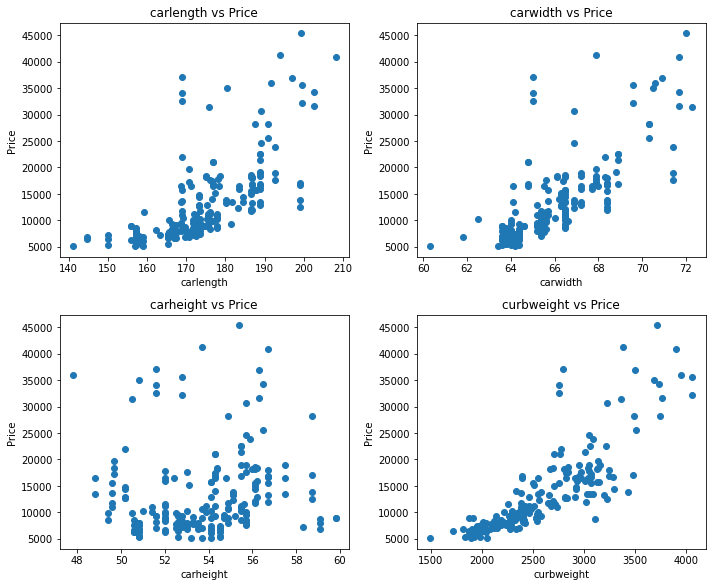

In [106]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars[x],cars['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

#### Inferência:

1. `carwidth`, `carlength` e `curbweight` parecem ter uma correlação positiva com `price`.
2. O `carheight` não mostra nenhuma tendência significativa com o preço.

### Etapa 4: Derivando novos atributos

In [ ]:
#Economia de combustível
cars['fueleconomy'] = (0.55 * cars['citympg']) + (0.45 * cars['highwaympg'])

In [107]:
#Classificação das empresas de automóveis com base nos preços médios de cada empresa.
cars['price'] = cars['price'].astype('int')
temp = cars.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
cars['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
cars.head()

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carsrange
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,Medium
2,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,Medium
3,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,Medium
4,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,Medium
5,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,Medium


### Lista de variáveis significativas após a análise visual:

Se fossemos analisar manualmente todas as váriáveis, estas seriam as selecionadas:

    - Car Range 
    - Engine Type 
    - Fuel type 
    - Car Body 
    - Aspiration 
    - Cylinder Number 
    - Drivewheel 
    - Curbweight 
    - Car Length
    - Car width
    - Engine Size 
    - Boreratio 
    - Horse Power 
    - Wheel base 
    - Fuel Economy 

In [108]:
# cars_lr = cars[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
#                   'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
#                     'fueleconomy', 'carlength','carwidth', 'carsrange']]
cars_lr = cars
print(cars_lr.shape)
cars_lr.head()

(205, 26)


,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carsrange
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,Medium
2,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,Medium
3,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,Medium
4,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,Medium
5,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,Medium


### Etapa 5: Variáveis Dummys

In [109]:
cat_vars = cars.select_dtypes(include=['object']).columns.tolist()
print(f'#{len(cat_vars)}: {cat_vars}')

#10: ['fueltype', 'CompanyName', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [110]:
def show_uniques(x,df):
    print(f'{x}: {df[x].unique()}')

for x in cat_vars:
    show_uniques(x,cars_lr)

fueltype: ['gas' 'diesel']
CompanyName: ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']
aspiration: ['std' 'turbo']
doornumber: ['two' 'four']
carbody: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel: ['rwd' 'fwd' '4wd']
enginelocation: ['front' 'rear']
enginetype: ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber: ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem: ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [112]:
# Converter a variável doornumber e cylindernumber para numérica. As demais são apenas qualitativas nominais
mapping = {'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}

cars_lr = cars_lr.applymap(lambda s: mapping.get(s) if s in mapping else s)

cars_lr['doornumber'].unique(), cars_lr['cylindernumber'].unique()

(array([2, 4]), array([ 4,  6,  5,  3, 12,  2,  8]))

In [113]:
cat_vars = cars_lr.select_dtypes(include=['object']).columns.tolist()
print(cars_lr.shape)
cars_lr = pd.get_dummies(cars_lr, columns=cat_vars, drop_first=True)
print(cars_lr.shape)
cars_lr.columns

(205, 26)
(205, 62)


Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'fueltype_gas', 'CompanyName_audi',
       'CompanyName_bmw', 'CompanyName_buick', 'CompanyName_chevrolet',
       'CompanyName_dodge', 'CompanyName_honda', 'CompanyName_isuzu',
       'CompanyName_jaguar', 'CompanyName_mazda', 'CompanyName_mercury',
       'CompanyName_mitsubishi', 'CompanyName_nissan', 'CompanyName_peugeot',
       'CompanyName_plymouth', 'CompanyName_porsche', 'CompanyName_renault',
       'CompanyName_saab', 'CompanyName_subaru', 'CompanyName_toyota',
       'CompanyName_volkswagen', 'CompanyName_volvo', 'aspiration_turbo',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
     

### Etapa 6: Divisão de treino-teste (Houdout) e normalização dos atributos

In [114]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
# Divisão Holdout 70% treino / 30% teste
df_train, df_test = train_test_split(cars_lr, test_size = 0.3, random_state = seed_number)

In [115]:
from sklearn.preprocessing import MinMaxScaler

num_vars = df_train.select_dtypes(exclude=['object']).columns.tolist()

scaler = MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [116]:
df_train.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,carsrange_Highend,carsrange_Medium
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.573427,0.552448,0.365899,0.506022,0.481061,0.497261,0.435077,0.244056,0.261934,0.578422,...,0.027972,0.300699,0.020979,0.083916,0.006993,0.489510,0.034965,0.006993,0.139860,0.412587
std,0.249210,0.498989,0.180897,0.187156,0.188272,0.208046,0.205616,0.117259,0.169570,0.194666,...,0.165472,0.460174,0.143818,0.278236,0.083624,0.501647,0.184337,0.083624,0.348061,0.494030
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.000000,0.239067,0.411940,0.333333,0.350000,0.278704,0.200000,0.139623,0.435714,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,1.000000,0.311953,0.500000,0.441667,0.525000,0.406129,0.200000,0.226415,0.578571,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.800000,1.000000,0.472303,0.679104,0.550000,0.654167,0.592708,0.200000,0.320755,0.753571,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Dividindo dados em variáveis X e y
y_train = df_train.pop('price')
X_train = df_train

In [ ]:
#Escalando o conjunto teste
df_test[num_vars] = scaler.transform(df_test[num_vars])

y_test = df_test.pop('price')
X_test = df_test

df_test.describe()

### Etapa 7: Construção do modelo

### MODELO 1 - Sem seleção de atributos

In [117]:
from sklearn.linear_model import LinearRegression

#treinando o modelo de regressão
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [118]:
#coeficiente de interseção e coeficiente angular
model1.intercept_, model1.coef_

(0.02208165194187542,
 array([ 0.02115443,  0.00227708,  0.02892086,  0.07329348,  0.17009829,
         0.11438196,  0.17245851,  0.23527002,  0.83953595, -0.10328199,
        -0.1868854 , -0.647917  ,  0.00736356,  0.15532068, -0.00879712,
         0.21602456,  0.09656617, -0.25542091,  0.06632186, -0.09072442,
        -0.11158221, -0.09740675, -0.14811893,  0.02223637,  0.05982999,
         0.17538433,  0.07518342, -0.0390451 ,  0.01692243,  0.02301746,
        -0.09439616,  0.3483125 ,  0.00759506, -0.03574762,  0.25542091,
        -0.05124942,  0.01171274, -0.0719422 , -0.03871508,  0.07811605,
        -0.00381823]))

### Etapa 8: Previsão e Avaliação

In [119]:
#predizendo o conjunto de teste
y_pred = model1.predict(X_test)

In [120]:
#plotando a comparação dos resultados
out = pd.DataFrame({'Real': y_test, 'Predito': y_pred})
out

,Real,Predito
car_ID,,
89,0.103297,0.058051
73,0.743210,0.749122
115,0.296832,0.292717
159,0.069013,0.016667
164,0.072985,0.080681
...,...,...
134,0.175066,0.187469
167,0.109726,0.115507
42,0.194305,0.114419


In [121]:
from sklearn import metrics #métricas de desempenho

def show_metrics(y_test, y_pred):
  #Imprimindo as métricas de desempenho
  print('MAE: {0}'.format(metrics.mean_absolute_error(y_test, y_pred)))
  print('MSE: {0}'.format(metrics.mean_squared_error(y_test, y_pred)))
  print('RMSE: {0}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
  print('R2: {0}'.format(metrics.r2_score(y_test, y_pred)))

show_metrics(y_test, y_pred)

MAE: 0.04221433397531252
MSE: 0.002735552144162535
RMSE: 0.05230250609829834
R2: 0.8644059096935055


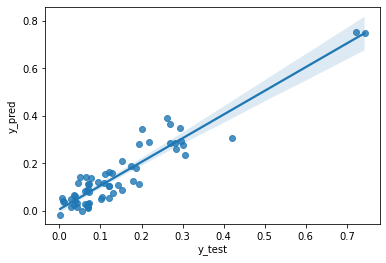

In [122]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
x, y = pd.Series(y_test, name="y_test"), pd.Series(y_pred, name="y_pred")
ax = sns.regplot(x, y)


### MODELO 2 - Com seleção de atributos

##### Seleção de atributos com RFE

O objetivo da eliminação de características recursivas (recursive feature elimination - RFE) é selecionar características considerando recursivamente conjuntos cada vez menores de características. Primeiro, o estimador é treinado no conjunto inicial de características e a importância de cada característica é obtida através de qualquer atributo específico ou chamável. Em seguida, os recursos menos importantes são removidos do conjunto atual de recursos. Esse procedimento é repetido recursivamente no conjunto podado até que o número desejado de características a serem selecionadas seja finalmente alcançado.

In [123]:
#RFE
from sklearn.feature_selection import RFE
import statsmodels.api as sm 
# from statsmodels.stats.outliers_influence import variance_inflation_factor

In [124]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(estimator=lm, n_features_to_select=20, step=1)
rfe = rfe.fit(X_train, y_train)

In [125]:
X_train.columns[rfe.support_]

Index(['carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'peakrpm', 'highwaympg',
       'fueltype_gas', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginelocation_rear', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_idi', 'carsrange_Highend'],
      dtype='object')

#### Construindo modelo usando statsmodel, para estatísticas detalhadas

In [92]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_test_rfe = X_test[X_test.columns[rfe.support_]]
X_train_rfe.shape, X_test_rfe.shape

((143, 20), (62, 20))

In [126]:
model2 = LinearRegression()
model2.fit(X_train_rfe, y_train)

#predizendo o conjunto de teste
y_pred_rfe = model2.predict(X_test_rfe)

In [127]:
#Imprimindo as métricas de desempenho
show_metrics(y_test, y_pred_rfe)

MAE: 0.03795915023792713
MSE: 0.0025071958941835647
RMSE: 0.05007190723533072
R2: 0.8757249255082014


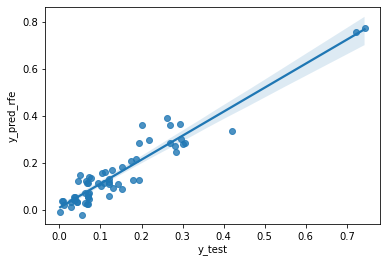

In [128]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
x, y = pd.Series(y_test, name="y_test"), pd.Series(y_pred_rfe, name="y_pred_rfe")
ax = sns.regplot(x, y)

### MODELO 3 - Removendo o atributo CompanyName


In [129]:
def drop_columns(df, substring):
    return df.loc[:, ~df.columns.str.contains(substring)]

#Removendo atributos CompanyName_*
X_train = drop_columns(X_train, 'CompanyName')
X_test = drop_columns(X_test, 'CompanyName')
X_train.columns

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'fueleconomy', 'fueltype_gas', 'aspiration_turbo',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'carsrange_Highend',
       'carsrange_Medium'],
      dtype='object')

In [130]:
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(estimator=lm, n_features_to_select=20, step=1)
rfe = rfe.fit(X_train, y_train)

X_train_rfe = X_train[X_train.columns[rfe.support_]]
print(X_train_rfe.shape)
X_test_rfe = X_test[X_test.columns[rfe.support_]]
print(X_test_rfe.shape)

(143, 20)
(62, 20)


In [131]:
model3 = LinearRegression()
model3.fit(X_train_rfe, y_train)

LinearRegression()

MAE: 0.03795915023792713
MSE: 0.0025071958941835647
RMSE: 0.05007190723533072
R2: 0.8757249255082014


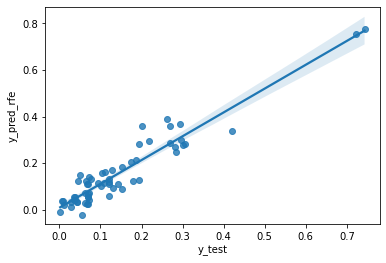

In [132]:
#predizendo o conjunto de teste
y_pred_rfe = model3.predict(X_test_rfe)

#Imprimindo as métricas de desempenho
show_metrics(y_test, y_pred_rfe)

#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
x, y = pd.Series(y_test, name="y_test"), pd.Series(y_pred_rfe, name="y_pred_rfe")
ax = sns.regplot(x, y)